In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("jobs_dataset_with_features.csv")

In [3]:
df.head(2)

,Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav..."


In [4]:
min_count = 6500
role_counts = df['Role'].value_counts()
dropped_classes = role_counts[role_counts < min_count].index
filtered_df = df[~df['Role'].isin(dropped_classes)].reset_index(drop=True)

filtered_df['Role'].value_counts()

Role
Interaction Designer          20580
Network Administrator         17470
User Interface Designer       14036
Social Media Manager          13945
User Experience Designer      13935
                              ...  
Benefits Coordinator           6839
Research Analyst               6830
Administrative Coordinator     6803
IT Support Specialist          6799
UI/UX Designer                 6743
Name: count, Length: 61, dtype: int64

In [5]:
len(filtered_df['Role'].value_counts())

61

In [6]:
df = filtered_df.sample(n=10000)

In [7]:
df.head()

,Role,Features
172933,Automation Tester,0 to 10 Years Software Tester M.Com Test autom...
254136,Data Scientist,3 to 8 Years Data Analyst M.Tech Machine learn...
399542,Frontend Developer,1 to 11 Years Software Engineer M.Com Proficie...
209129,Frontend Developer,1 to 8 Years Software Engineer BA Proficiency ...
36568,Wedding Planner,0 to 11 Years Event Planner BBA Wedding planni...


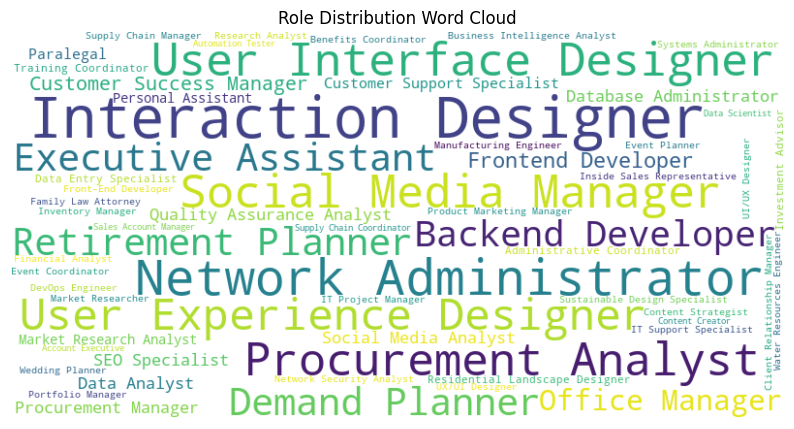

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud from the role counts
role_counts = df['Role'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(role_counts)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Role Distribution Word Cloud')
plt.show()

In [12]:

df['Role'].unique()

array(['Automation Tester', 'Data Scientist', 'Frontend Developer',
       'Wedding Planner', 'Inside Sales Representative',
       'Customer Support Specialist', 'Interaction Designer',
       'Social Media Analyst', 'Market Research Analyst',
       'Systems Administrator', 'UI/UX Designer', 'Content Strategist',
       'Retirement Planner', 'SEO Specialist', 'Network Security Analyst',
       'Inventory Manager', 'Data Entry Specialist', 'Market Researcher',
       'Portfolio Manager', 'Benefits Coordinator', 'Procurement Analyst',
       'Manufacturing Engineer', 'Water Resources Engineer',
       'Executive Assistant', 'Family Law Attorney', 'Investment Advisor',
       'Training Coordinator', 'User Interface Designer', 'Event Planner',
       'Personal Assistant', 'Quality Assurance Analyst',
       'Customer Success Manager', 'Procurement Manager',
       'Demand Planner', 'Residential Landscape Designer',
       'Network Administrator', 'Financial Analyst', 'DevOps Engineer',
 

In [13]:
df.isnull().sum()

Role        0
Features    0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into features (X) and target (y)
X = df['Features']
y = df['Role']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [29]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

y_pred = rf_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [30]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def job_recommendation(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [31]:
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = job_recommendation(resume_file)
print("Predicted Category:", predicted_category)


Predicted Category: User Interface Designer


In [32]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier_job_recommendation.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer_job_recommendation.pkl','wb'))